In [1]:
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt
import keras.utils


Using TensorFlow backend.


In [2]:
model = keras.models.load_model("InceptionV31244260319Batch284.h5")

Parabola:77.64%  Elipse:22.36%


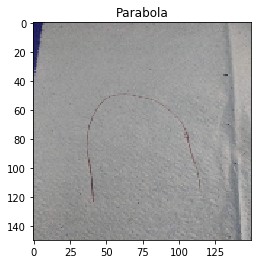

In [11]:
X = []
def prepare(filepath):
    imgSize = 150
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    new_array = cv2.resize(img_array, (imgSize, imgSize))
    X.append(np.array(new_array))


prepare('Photos/3.jpg')

X=np.array(X)
X=X/255


pre = model.predict_classes(X)
porc = model.predict_proba(X)

if pre == 1:
    plt.title("Elipse")
    plt.imshow(X[0])
    print("Parabola:{:.2f}%  Elipse:{:.2f}%".format(porc[0][0]*100, porc[0][1]*100))
else:
    plt.title("Parabola")
    plt.imshow(X[0])
    print("Parabola:{:.2f}%  Elipse:{:.2f}%".format(porc[0][0]*100, porc[0][1]*100))

In [22]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB')